# Análise de Agrupamento de Vinhos com K-means

Neste notebook, utilizamos o algoritmo K-means para agrupar uma base de dados de vinhos, buscando identificar características semelhantes entre eles.

## Variáveis Disponíveis

- Alcohol
- Malicacid
- Ash
- Alcalinity_of_ash
- Magnesium
- Total_phenols
- Flavanoids
- Nonflavanoid_phenols
- Proanthocyanins

In [14]:
# 1. Instalação de Dependências
# Execute esta célula para garantir que todas as bibliotecas necessárias estão instaladas.
!pip install pandas streamlit matplotlib seaborn scikit-learn requests# 1. Instalação de Dependências
# Execute esta célula para garantir que todas as bibliotecas necessárias estão instaladas.
!pip install pandas streamlit matplotlib seaborn scikit-learn requests

ERROR: Invalid requirement: 'requests#': Expected end or semicolon (after name and no valid version specifier)
    requests#
            ^


In [15]:
# 1. Instalação de Dependências
# Execute esta célula para garantir que todas as bibliotecas necessárias estão instaladas.
!pip install pandas streamlit matplotlib seaborn scikit-learn requests

In [16]:
# 2. Importação de Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import requests
from io import StringIO

In [17]:
# 3. Carregamento do Dataset
# URL do arquivo CSV no GitHub
url = 'https://raw.githubusercontent.com/alansms/banco_de_dados_vinhos/main/wine.csv'

# Tentar baixar o dataset
try:
    response = requests.get(url)
    response.raise_for_status()
    data = response.text
    df = pd.read_csv(StringIO(data))
    print("Dados carregados com sucesso.")
except requests.exceptions.RequestException as err:
    print(f"Erro na requisição: {err}")

Dados carregados com sucesso.


In [18]:
# 4. Pré-processamento dos Dados
# Remover colunas duplicadas
df = df.loc[:, ~df.columns.duplicated()]

# Manter apenas as colunas relevantes
expected_columns = ['Nome do Vinho', 'Origem', 'Teor Alcoólico', 'Acidez Málica',
                    'Cinzas', 'Alcalinidade das Cinzas', 'Magnésio', 'Fenóis Totais',
                    'Flavonoides']

available_columns = [col for col in expected_columns if col in df.columns]
df = df[available_columns]

# Exibir o DataFrame para verificação
print("DataFrame verificado:")
df.head()

DataFrame verificado:


,Nome do Vinho,Origem,Teor Alcoólico,Acidez Málica,Cinzas,Alcalinidade das Cinzas,Magnésio,Fenóis Totais,Flavonoides
0,Château Margaux,Itália,14.23,1.71,2.43,15.6,127,2.80,3.06
1,Domaine de la Romanée-Conti,França,13.20,1.78,2.14,11.2,100,2.65,2.76
2,Sassicaia,Espanha,13.16,2.36,2.67,18.6,101,2.80,3.24
3,Opus One,Portugal,14.37,1.95,2.50,16.8,113,3.85,3.49
4,Petrus,Argentina,13.24,2.59,2.87,21.0,118,2.80,2.69


In [19]:
# Converter as colunas numéricas
numeric_columns = ['Teor Alcoólico', 'Acidez Málica', 'Cinzas', 'Alcalinidade das Cinzas',
                   'Magnésio', 'Fenóis Totais', 'Flavonoides']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remover linhas com valores nulos
df.dropna(subset=numeric_columns, inplace=True)

       Teor Alcoólico  Acidez Málica      Cinzas  Alcalinidade das Cinzas  \
count      178.000000     178.000000  178.000000               178.000000   
mean        13.000618       2.336348    2.366517                19.494944   
std          0.811827       1.117146    0.274344                 3.339564   
min         11.030000       0.740000    1.360000                10.600000   
25%         12.362500       1.602500    2.210000                17.200000   
50%         13.050000       1.865000    2.360000                19.500000   
75%         13.677500       3.082500    2.557500                21.500000   
max         14.830000       5.800000    3.230000                30.000000   

         Magnésio  Fenóis Totais  Flavonoides  
count  178.000000     178.000000   178.000000  
mean    99.741573       2.295112     2.029270  
std     14.282484       0.625851     0.998859  
min     70.000000       0.980000     0.340000  
25%     88.000000       1.742500     1.205000  
50%     98.000000 

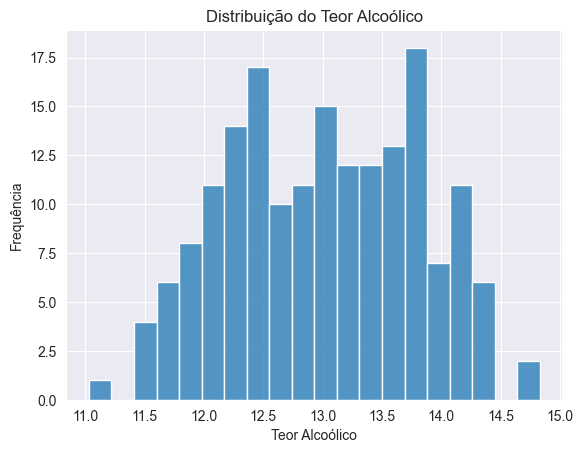

In [20]:
# 5. Análise Exploratória
# Exibir estatísticas descritivas
print(df.describe())

# Visualização da distribuição de uma das variáveis
sns.histplot(df['Teor Alcoólico'], bins=20)
plt.title('Distribuição do Teor Alcoólico')
plt.xlabel('Teor Alcoólico')
plt.ylabel('Frequência')
plt.show()

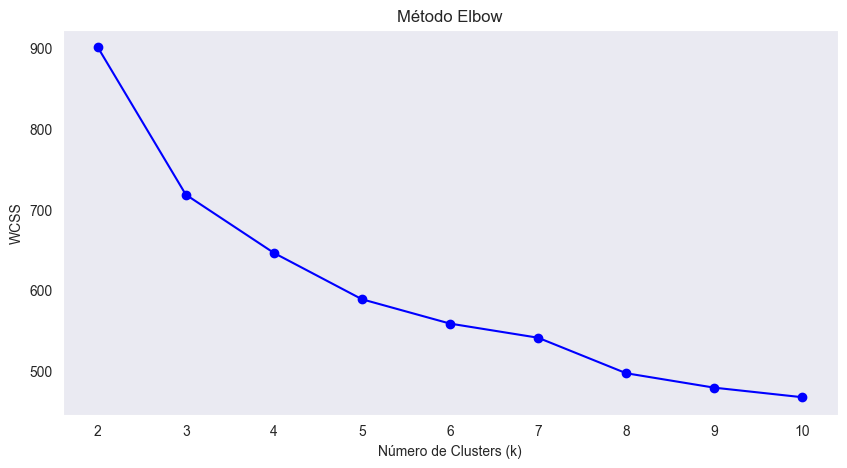

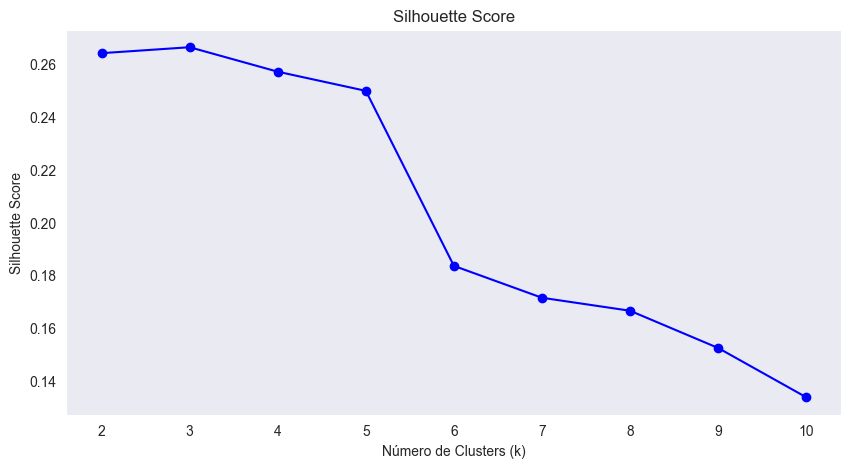

In [21]:
# 6. Ajuste do K-means
# Normalização dos dados para clustering
X = df[numeric_columns]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinação do número ideal de clusters usando o método Elbow
wcss = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotando o gráfico do Método Elbow
plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS')
plt.title('Método Elbow')
plt.grid()
plt.show()

# Plotando o gráfico do Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.grid()
plt.show()

Características médias de cada cluster:
   Cluster  Teor Alcoólico  Acidez Málica    Cinzas  Alcalinidade das Cinzas  \
0        0       12.311818       1.736515  2.174394                19.225758   
1        1       13.030943       3.536792  2.465283                21.728302   
2        2       13.743898       1.928983  2.492712                17.789831   

     Magnésio  Fenóis Totais  Flavonoides  
0   92.318182       2.219394     2.014697  
1   98.943396       1.737358     0.983585  
2  108.762712       2.880847     2.984915  


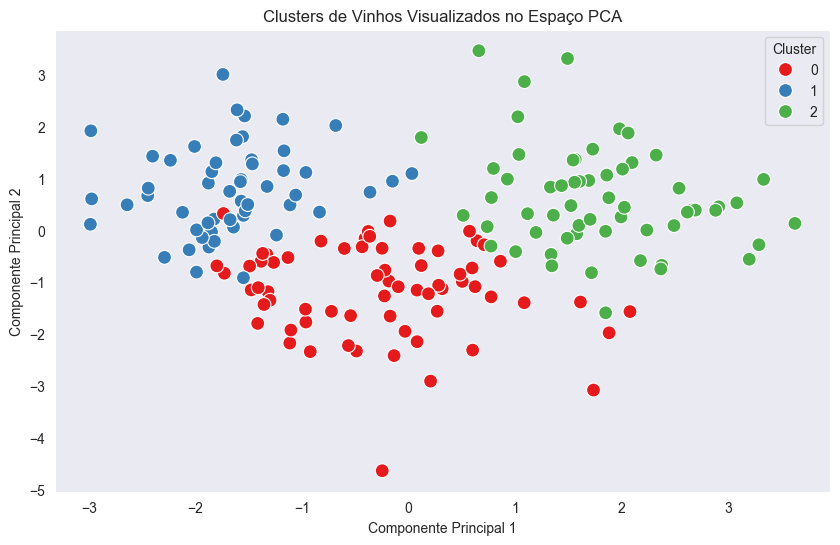

In [22]:
# 7. Resultados do K-means
# Seleção do número ideal de clusters
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Adicionar os labels dos clusters ao DataFrame original
df['Cluster'] = labels

# Análise das características médias por cluster
cluster_means = df.groupby('Cluster')[numeric_columns].mean().reset_index()
print("Características médias de cada cluster:")
print(cluster_means)

# Gráfico PCA para visualização dos clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Adicionar as componentes principais ao DataFrame
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plotar os clusters no espaço PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set1', s=100)
plt.title('Clusters de Vinhos Visualizados no Espaço PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid()
plt.show()